# 히트맵 시각화

(1, 7, 7)


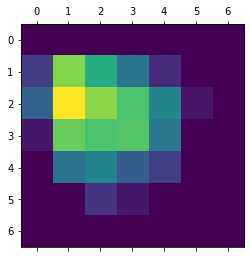

In [5]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import load_model

from tensorflow.keras import preprocessing
from tensorflow.keras import backend as K
from tensorflow.keras import models

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

image_size = 224
image_path = "/분류를 희망하는 이미지 경로입니다."
model_path = '/모델의 경로를 입력/res_net50modelWpatience_camp7.h5'

model = load_model(model_path) 
image = load_img(image_path, target_size=(image_size, image_size))
img_tensor = preprocessing.image.img_to_array(image)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

conv_layer = model.get_layer("conv2d_106") #resnet50의 가장 마지막 층 입니다.
heatmap_model = models.Model([model.inputs], [conv_layer.output, model.output])

with tf.GradientTape() as gtape:
    conv_output, predictions = heatmap_model(img_tensor)
    loss = predictions[:, np.argmax(predictions[0])]
    grads = gtape.gradient(loss, conv_output)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

heatmap = tf.reduce_mean(tf.multiply(pooled_grads, conv_output), axis=-1)
heatmap = np.maximum(heatmap, 0)
max_heat = np.max(heatmap)
if max_heat == 0:
    max_heat = 1e-10
heatmap /= max_heat

print(heatmap.shape)
plt.matshow(heatmap[0])
plt.show()

In [6]:
import cv2

img = cv2.imread(image_path)

heatmap = cv2.resize(heatmap[0],(img.shape[1],img.shape[0]))

heatmap = np.uint8(255*heatmap)

heatmap = cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)

superimposed_img = heatmap*0.4 +img

#생성된 히트맵 이미지를 저장
cv2.imwrite('heatmap.jpg',superimposed_img)

True